## Regression with statsmodels

In [1]:
%%capture

%run './lib/init.ipynb'
from lib import utilities as util
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [26]:
trainDf  = util.load_df('trainDf')
validDf  = util.load_df('validDf')
studyVars = [
  'student_duration_mins',
  'timeliness_duration_mins',
  # 'item_attempt_duration_mins',
  'item_type_code_name_swoe',
  'number_of_distinct_instance_items'
]

###### Create regression dataframe
 - completed items
 - study variables
  - target
  - student_duration_mins
  - timeliness_duration_mins
  - item_attempt_duration_mins
  - item_type_code_name_swoe
  - number_of_distinct_instance_items

In [27]:
trnDf = trainDf.select('target',*studyVars).toPandas()
valDf = validDf.select('target',*studyVars).toPandas()

###### Dataframe structure

In [28]:
trnDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47221 entries, 0 to 47220
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   target                             47221 non-null  int32  
 1   student_duration_mins              47221 non-null  float64
 2   timeliness_duration_mins           47221 non-null  float64
 3   item_type_code_name_swoe           47221 non-null  float64
 4   number_of_distinct_instance_items  47221 non-null  int32  
dtypes: float64(3), int32(2)
memory usage: 1.4 MB


###### Target variable barplot

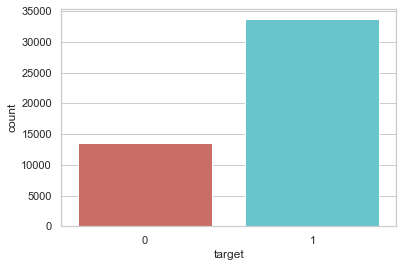

In [29]:
sns.countplot(x='target',data=trnDf, palette='hls')
plt.show()

###### Target variable percentages

In [30]:
count_no_pass = len(trnDf[trnDf['target'] == 0])
count_pass = len(trnDf[trnDf['target'] == 1])
pct_of_no_pass = count_no_pass / (count_no_pass+count_pass)
print("percentage of no pass is", round(pct_of_no_pass * 100), '%')
pct_of_pass = count_pass/(count_no_pass + count_pass)
print("percentage of passes", round(pct_of_pass * 100), '%')

percentage of no pass is 29 %
percentage of passes 71 %


###### Number of missing values

In [31]:
trnDf.isnull().sum()

target                               0
student_duration_mins                0
timeliness_duration_mins             0
item_type_code_name_swoe             0
number_of_distinct_instance_items    0
dtype: int64

###### Number of distinct instance items histogram

Text(0, 0.5, 'Frequency')

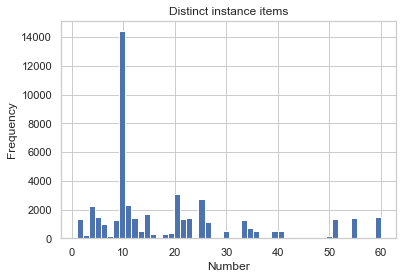

In [32]:
trnDf.number_of_distinct_instance_items.hist(bins=50)
plt.title('Distinct instance items')
plt.xlabel('Number')
plt.ylabel('Frequency')

###### Target vs number of distinct instance items scatter plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


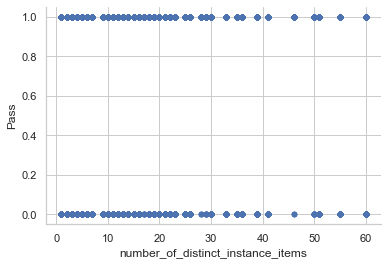

In [33]:
trnDf.plot.scatter('number_of_distinct_instance_items', 'target')
plt.ylabel('Pass')
sns.despine()

###### Item type code name swoe histogram

Text(0, 0.5, 'Frequency')

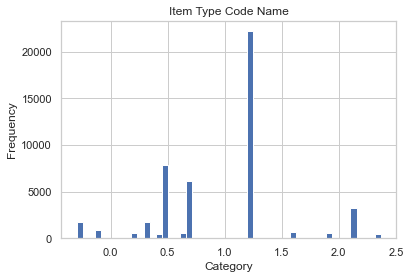

In [34]:
trnDf.item_type_code_name_swoe.hist(bins=50)
plt.title('Item Type Code Name')
plt.xlabel('Category')
plt.ylabel('Frequency')

###### Target vs item type code name scatter plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


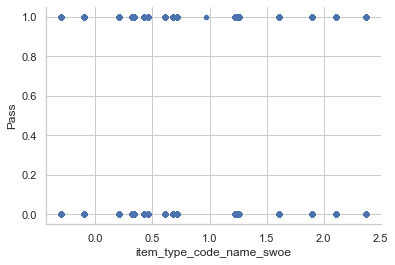

In [35]:
trnDf.plot.scatter('item_type_code_name_swoe', 'target')
plt.ylabel('Pass')
sns.despine()

###### Attempt duration minutes histogram

In [36]:
trnDf.item_attempt_duration_mins.hist(bins=100)
plt.title('Attempt Duration')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

AttributeError: 'DataFrame' object has no attribute 'item_attempt_duration_mins'

###### Target vs Attempt duration minutes scatter plot

In [ ]:
trnDf.plot.scatter('item_attempt_duration_mins', 'target')
plt.ylabel('Pass')
sns.despine()

###### Student duration minutes histogram

In [ ]:
trnDf.student_duration_mins.hist(bins=100)
plt.title('Student Duration')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

###### Target vs Student duration minutes scatter plot

In [ ]:
trnDf.plot.scatter('student_duration_mins', 'target')
plt.ylabel('Pass')
sns.despine()


###### Timeliness duration minutes histogram

Text(0, 0.5, 'Frequency')

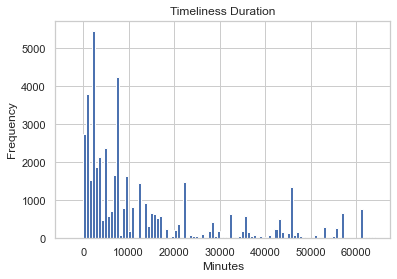

In [37]:
trnDf.timeliness_duration_mins.hist(bins=100)
plt.title('Timeliness Duration')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

###### Target vs Timeliness duration minutes scatter plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


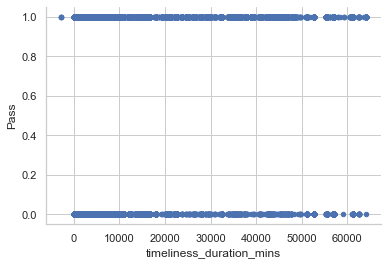

In [38]:
trnDf.plot.scatter('timeliness_duration_mins', 'target')
plt.ylabel('Pass')
sns.despine()

###### Check the independence between the independent variables

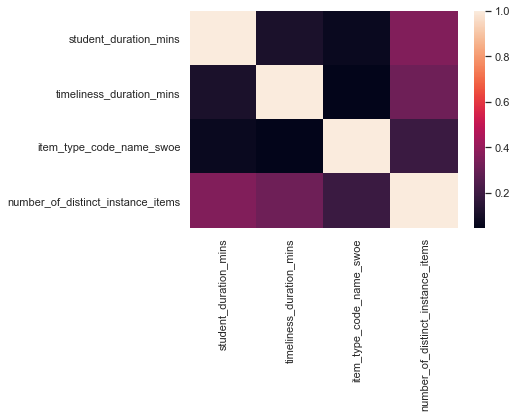

In [39]:
sns.heatmap( trnDf[trnDf.columns.intersection(studyVars)].corr())
plt.show()

Correlation less than .5

###### Train

In [40]:
y_train = trnDf[['target']]
X_train = trnDf[studyVars]

logreg = sm.Logit(y_train, X_train).fit()

logreg.summary()

Optimization terminated successfully.
         Current function value: 0.567225
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                47221
Model:                          Logit   Df Residuals:                    47217
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Nov 2020   Pseudo R-squ.:                 0.05358
Time:                        16:07:46   Log-Likelihood:                -26785.
converged:                       True   LL-Null:                       -28301.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
student_duration_mins                 0.0008      0.000      5.908      0.000       0.001       0.001
timeliness_duration_mins           1.739e-06   7.13e-07      2.438      0.015    3.41e-07    3.14e-06
item_type_code_name_swoe              0.8687      0.015     57.443      0.000       0.839       0.898
number_of_distinct_instance_items     0.0054      0.001      6.556      0.000       0.004       0.007
=====================================================================================================
"""

###### Validate

In [41]:
y_valid = trnDf[['target']]
X_valid = trnDf[studyVars]

yhat = logreg.predict(X_valid)
prediction = list(map(round, yhat))
#
# # comparing original and predicted values of y
# print('Actual values', list(y_valid.values))
# print('Predictions :', prediction)

###### Test Accuracy

In [42]:
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)

# confusion matrix
cm = confusion_matrix(y_valid, prediction)
print ("Confusion Matrix : \n", cm)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_valid, prediction))

Confusion Matrix : 
 [[ 1090 12457]
 [  848 32826]]
Test accuracy =  0.7182397662057136


###### Reciever Operating Characteristic (ROC) Curve

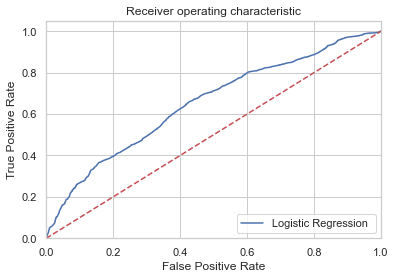

In [43]:
# Ref: https://jbhender.github.io/Stats506/F18/GP/Group5.html

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# logit_roc_auc = roc_auc_score(y, pred)
fpr, tpr, thresholds = roc_curve(y_valid, yhat)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression ')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()


In [25]:
from lib import stepwise

sout = stepwise.forwardSelection(X_train, y_train, model_type ="logistic")

Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.599339
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597327
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598219
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593968
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569137
         Iterations 5
Entered : item_type_code_name_swoe 	AIC : 53754.40084708147
Optimization terminated successfully.
         Current function value: 0.567960
         Iterations 6
Optimization terminated successfully.
         Current fu

In [24]:
from lib import stepwise

sout = stepwise.backwardSelection(X_train, y_train, model_type ="logistic")

Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.566504
         Iterations 6
Eliminated : item_attempt_duration_mins
Optimization terminated successfully.
         Current function value: 0.566504
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                47221
Model:                          Logit   Df Residuals:                    47216
Method:                           MLE   Df Model:                            4
Date:                Wed, 11 Nov 2020   Pseudo R-squ.:                 0.05479
Time:                        16:03:41   Log-Likelihood:                -26751.
converged:                       True   LL-Null:                       -28301.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err  